<h1>Opgavesæt uge 5 - A</h1>

<h3>Opgave 2</h3>
Vis at hvis alle brikker ikke står på deres korrekte pladser i starten, så kræves mindst
n=2 ombytninger for at løse puslespillet.

Hvis ingen brik står på den rigtige plads er der 1 cycle. Man kan dele en cycle n/2 gange for at komme ned til at alle cycler er del. Det kan man vise grafisk med en binær træstruktur:
<img src="binarytree.png">
Du tæler antallet af nodes, som du har delt.
Som du kan se er der 15 nodes. Så det er altså i virkeligheden int(n/2), som smidder resten væk.


<h3>opgave 4</h3>
Lav et Java- eller Python-program, som genererer en tilfældig permu-
tation af heltallene fra 0 til n-1 (for et n som er en input parameter).
I Python kan man bruge lister samt funktionen shuffle fra modulet random. Udskriv tallene i din permu-
tation. D

In [1]:
import random
#print random.randint(0, 5) 1,2,3,4 or 5

def makeList(num_range):
    # using Fisher–Yates shuffle Algorithm
    test_list = [x for x in range(num_range)]
    for i in range(len(test_list)-1, 0, -1):
        j = random.randint(0, i)
        # Swap arr[i] with the element at random index
        test_list[i], test_list[j] = test_list[j], test_list[i]
    return test_list

<h3>Opgave 5</h3>

In [13]:
def count_cycles(numlist):
    count = 0
    used = []
    for i in range(len(numlist)):      
        
        if i in used:  ### Kør ikke, hvis i har været talt her er der plads til forbedring. O(n^2)
            continue
        
        if i == numlist[i]:  ### Hvis tallet står på det rigtige sted, så spring over.
            count += 1
            used.append(i)
            continue
            
        start = i
        nextindex = numlist[i]
        used.append(i)
        while nextindex != start:        ### Kør igennem indtil vi er tilbage til start index. O(n)
            used.append(nextindex)
            nextindex = numlist[nextindex]
            
        count += 1
    return count     
        

<b>Kørselstid O(n^2):</b> I den nuværende algoritme holder vi en liste, som holder styr på, om man har brugt et tal i en cycle eller ej. Vi går videre hvis tallet er ubrugt. Sådan som det er implementeret nu, vokserne denne liste til n og man skal derfor lede en liste med størrelsen n igennem for hvert run. Det gør algoritmen eksponentiel.


<h1>Opgave 5 - B</h1>

<h3> opgave 2 </h3>
I øvelsestimen lavede du et program, som kunne generere en tilfældig
permutation, og et program, som kunne tælle antal kredse i en per-
mutation.
Brug disse programmer til at generere en masse tilfældige permuta-
tioner af længde 16, og tæl for hver af dem antallet af kredse i dem.

In [6]:
def frequency_dist():
    freq_dist = {}
    for i in range(10000000):
        thelist = makeList(16)
        count = count_cycles(thelist)
        if count in freq_dist:
            freq_dist[count] += 1
        else:
            freq_dist[count] = 1
    return freq_dist

freq_dist = frequency_dist()
import collections
freq_dist = collections.OrderedDict(sorted(freq_dist.items()))

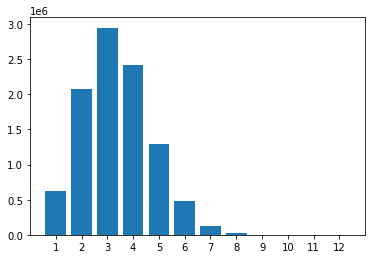

In [7]:
import matplotlib.pyplot as plt


plt.bar(range(len(freq_dist)), list(freq_dist.values()), align='center')
plt.xticks(range(len(freq_dist)), list(freq_dist.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

In [11]:
mean = 0
for key,value in freq_dist.items():
    print(f"P(cycle_count = {key} )  {key}: {value} / 1000000 = {value/10000000}")
    mean += key * (value/10000000)
print(f"Mean = E(X): {mean}")

P(cycle_count = 1 )  1: 625706 / 1000000 = 0.0625706
P(cycle_count = 2 )  2: 2073975 / 1000000 = 0.2073975
P(cycle_count = 3 )  3: 2947060 / 1000000 = 0.294706
P(cycle_count = 4 )  4: 2417853 / 1000000 = 0.2417853
P(cycle_count = 5 )  5: 1292641 / 1000000 = 0.1292641
P(cycle_count = 6 )  6: 481756 / 1000000 = 0.0481756
P(cycle_count = 7 )  7: 130258 / 1000000 = 0.0130258
P(cycle_count = 8 )  8: 26292 / 1000000 = 0.0026292
P(cycle_count = 9 )  9: 3990 / 1000000 = 0.000399
P(cycle_count = 10 )  10: 428 / 1000000 = 4.28e-05
P(cycle_count = 11 )  11: 39 / 1000000 = 3.9e-06
P(cycle_count = 12 )  12: 2 / 1000000 = 2e-07
Mean = E(X): 3.3802773999999998


In [10]:
mean = 0
for i in range(1,17):
    mean += 1/i
print(mean)

3.3807289932289937
